# Applying the Bias parameter in Perceptron using Intel® Python

<p style='text-align: justify;'> 
This section will add a BIAS parameter to the Perceptron Algorithm we built in the previous notebooks using Intel® Python. Without a bias, the activation function of the perceptron would be forced to pass through the origin (0,0), which can limit its ability to learn patterns in more complex data.
</p>

## Perceptron Theory: Linearly separable problems


<p style='text-align: justify;'> 
The perceptron is a learning model that can only solve problems that can be divided into linear segments. This indicates that it can only separate and categorize data that can be divided by a single line or hyperplane. The perceptron is appropriate for cases where data can be divided into two or more different classes and separated by a line or hyperplane in the feature space.
</p>    

<p style="text-align: center;">
 <img src="images/figure4_perceptronTheory.png"  width="600" height="600">
</p>

<p style='text-align: justify;'>
From the point of view of a problem with two parameters, when the classification value depends on "AND" and "OR" relationships between inputs, it is a linearly separable problem. In cases where the relationship is "XNOR," it is a non-linearly separable problem:
</p>

<p style="text-align: center;">
 <img src="images/figure5 perceptronBias.png"  width="500" height="500">
</p>

## The Problem: The separation line 

<p style='text-align: justify;'>
The last Perceptron Algorithm classifies data into two classes. They used separation lines that were forced to pass through the origin (0,0). That characteristic limits the model's ability to adjust the line correctly, reducing the accuracy of predictions. The following figure shows a case of a linearly separable problem where it is impossible to draw the separation line in a way that passes through the origin. Therefore, using the models worked so far to solve this problem would not be possible.
</p>    

<p style="text-align: center;">
 <img src="images/figure6_perceptronSeparationLin.png"  width="800" height="800">
</p>

## The Solution: BIAS parameter


<p style='text-align: justify;'>
The word BIAS in the context of perceptrons refers to a different parameter added to the model's input and acts as an offset or threshold for activation. Moving the decision boundary further from the origin, the perceptron can segregate data in some specific cases that are linearly separable.
</p> 
<p style='text-align: justify;'> 
It can be changed during model training for the best possible prediction accuracy. In other words, the bias allows the model to be more flexible to the data it is trying to learn from and forecast, in addition to enabling the resolution of more specific linear issues. 
</p> 
<p style='text-align: justify;'> 
We can also use BIAS weights o obtain the separation line of the perceptron, based on the construction of a straight line using a first-degree function, with the model $f(x) = ax + b$. We must use the input weights to calculate the coefficients $a$ and $b$.
</p>    

<p style='text-align: justify;'>
For the perceptron to "leave the point (0,0)", another factor is added to the result. Then just do the equation, where $n$ is the input data number, $W$ are the weights and $X$ are the inputs and $b$ is the bias, or trend. The parameter $b$ is an arbitrary number different of $0$. In this way, the process becomes:
</p>
$$
x = \bigg( \sum_{i = 0}^{n} (W_i * X_i)\bigg) + b
$$

## ☆ Challenger: Classification of Roses and Violets Modified ☆

Consider the following problem that is a variation of the previosly. Modify the weights so that the perceptron can solve the follow problems:

| Problem A   |      Problem B      |        
|:----------: |:-------------:|
| <img src="images/figure3_rosesXviolets.png"  width="500" height="500"> |  <img src="images/figure7_violetsXroses.png"  width="500" height="500"> |         

- Implement BIAS parameter at Perceptron Neural Network with Intel® Python for the Problem B.

## ☆ Solution ☆ 

<p style='text-align: justify;'>
To classify a flower as a Rose or Violet, we will consider both the height and the color of the flower on the spectrum. Therefore, if a flower has at least five units tall and has at least five units of color, it will be classified as a rose; otherwise, it will be classified as a violet. Thus, we analyze a situation where both stem and color must be met to be classified as another class.
</p>    

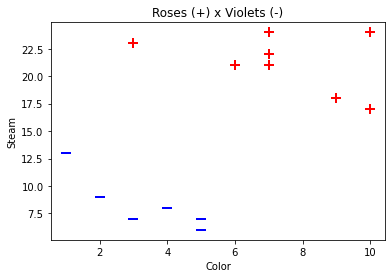

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# X_inputs = ([[color, stem], [color, stem] ...]) = np.array([
X_inputs = np.array([
             [ 5, 7 ],    # Violet
             [ 4, 8 ],    # Violet
             [ 3, 7 ],    # Violet
             [ 5, 6 ],    # Violet
             [ 2, 9 ],    # Violet
             [ 1, 13 ],   # Violet
             [ 10, 24 ],  # Rose
             [ 7, 21 ],   # Rose
             [ 7, 24 ],   # Rose
             [ 7, 22 ],   # Rose                       
             [ 6, 21 ],   # Rose
             [ 9, 18 ],   # Rose
             [ 10, 17],   # Rose
             [ 3, 23 ]    # Rose
           
])

## Expected outcomes for each input
expected_outputs = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

for result, input in zip(expected_outputs, X_inputs):
    if result == 1: # Rose
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=2, color="red")
    else: # Violets
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=2, color="blue")

plt.xlabel('Color')
plt.ylabel('Steam')
plt.title('Roses (+) x Violets (-)')
plt.show()

To implement BIAS we just need to add one more line at our dot product that will be constant. Or, you can also add one more constant parameter to the inputs, which will be our BIAS. Thus, during the training period of the perceptron weights, it will adjust to the correct height for each problem.

In [2]:
def perceptron_sgd(X_inputs, expected_outputs):
    weights = np.random.randn(len(input) + 1) / np.sqrt(len(input)) # BIAS weight being inserted randmly with the "+ 1" mathematical term
    learning_rate = 0.1
    epochs = 100

    ## Perceptron weights adjusting  
    X_inputs = np.c_[X_inputs, np.ones((X_inputs.shape[0]))] #BIAS input being inserted at the input vector as 1 constant 
    for _ in range(epochs):
        for i in range(len(X_inputs)): 
            sample = X_inputs[i]            
            current_output = sigmoid(np.dot(sample, weights)) 
            if current_output != expected_outputs[i]: 
                error = expected_outputs[i] - current_output
                weights += learning_rate * error * sample 
    return weights

weights = perceptron_sgd(X_inputs,expected_outputs)
print("Weights:")
print(weights)

Weights:
[  0.70696381   0.85196675 -15.65315816]


After the weights training, we are good to test if the Perceptron can classify the flowers:

In [3]:
result_array = []
inputs_bias = np.c_[X_inputs, np.ones((X_inputs.shape[0]))]

for i in range(len(inputs_bias)): 
    sample = inputs_bias[i]   
    if sigmoid(np.dot(sample, weights)) > 0.5:
        result_array.append(1)
    else:
        result_array.append(0)
print(result_array)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


Now, plot the grafic based on the results:

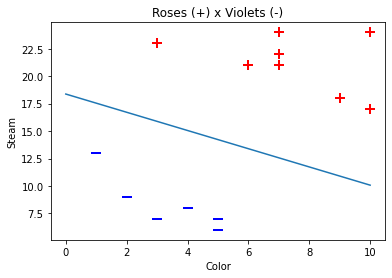

In [4]:
for result, sample in zip(result_array, X_inputs):
    if result == 1: # rose
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color="red")
    else: # violet
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color="blue")
                
plt.xlabel('Color')
plt.ylabel('Steam')
plt.title('Roses (+) x Violets (-)')

#Calculanting the  Decision Boundary
def f(x):
    return ((-weights[0]/weights[1]))*x + -(weights[2]/weights[1])

x = np.array([0, 10])
y = f(x)
plt.plot(x,y)
plt.show()

In [5]:
def plot_perceptron(W1, W2, Bias):
    # Create the Weights and Bias based on the slide
    weights = np.array([W1, W2, Bias])
    # Input with a third value as 1 to bias
    inputs_bias = np.c_[X_inputs, np.ones((X_inputs.shape[0]))]

    # Predict
    result_array = []
    for i in range(len(inputs_bias)): 
        sample = inputs_bias[i]   
        if sigmoid(np.dot(sample, weights)) > 0.5:
            result_array.append(1)
        else:
            result_array.append(0)
    
    # Plot Result
    acc = 0
    tot = len(result_array)
    for y_pred, y_true, sample in zip(result_array, expected_outputs, X_inputs):
        c = 'b'# violet
        if y_true == 1:
            c = 'r' # rose
        if y_true == y_pred:
            acc += 1 # number of network hits
        if y_pred == 1: # rose
            plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color=c)
        else: # violet
            plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color=c)
                
    plt.xlabel('Color')
    plt.ylabel('Steam')
    plt.title(f'Roses (Truth:Red Pred:+ ) x Violets (Truth:Blue Pred:- ) [Acc: {acc/tot*100:.2f}%]')

    # Calculanting the Decision Boundary:
    def f(x):
        w1 = weights[1]
        if weights[1] == 0: # Avoid division by zero 
            w1 = 0.0000001
        return ((-weights[0]/w1))*x + -(weights[2]/w1)
    x = np.array([-1, 11])
    y = f(x)
    
    #Plot
    plt.plot(x, y)
    plt.xlim([-1, 11])
    plt.ylim([-1, 31])
    plt.show()

In [6]:
from ipywidgets import interactive
from IPython.display import display, HTML
interactive_plot = interactive(plot_perceptron, 
                               W1=(-10, 10, 0.01),
                               W2=(-10, 10, 0.01),  
                               Bias=(-110, 110, 0.01))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='W1', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

##### Discussion: What happened?

- ``What happens if we vary W1 and W2?``

- ``What happens when the BIAS is 0%? And with 100%?``

## Summary

<p style='text-align: justify;'>
Applying the Bias parameter in Perceptron Neural Network is an adjustable, numerical term added to a perceptron's weighted sum of inputs and weights that can increase classification model accuracy.  It is used to offset the result and helps the models to shift the activation function towards the positive or negative side.  
</p>

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [8]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

In this section you learned how to apply the Bias parameter in Perceptron using Intel® Python for data classification. In the next section, you will see  how to the perceptron learning, and after many guesses and adjustments, the weights will be correct in the notebook [_03-percepetron-training.ipynb_](03-percepetron-training.ipynb)